# Penguins Data Modeling and Analysis

## **Introduction**

In this notebook, I will analyze penguin data to explore patterns and relationships using statistical modeling techniques. As a consultant for a scientific organization dedicated to supporting and sustaining penguin colonies, my task is to help staff members gain deeper insights into penguin populations. The dataset includes information on 345 penguins, covering species, island location, and other attributes. Using Python, I will apply exploratory data analysis, data cleaning, and statistical modeling, including simple and multiple linear regression to examine relationships and K-means clustering to identify meaningful groupings. These analyses will provide valuable insights into penguin characteristics and support conservation efforts.

## **Overview**  

To achieve the objectives of this project, I will:  

- **Perform Exploratory Data Analysis (EDA):** Summarize and visualize key characteristics of the penguin dataset, including species, island, and sex, to gain initial insights into the data.  

- **Conduct Data Cleaning:** Handle missing values, outliers, and inconsistencies in the dataset to ensure the quality and reliability of the data for modeling.  

- **Build a Linear Regression Model:** Use Python libraries such as pandas and statsmodels to construct a simple linear regression model, identifying relationships between key variables.  

- **Develop a Multiple Linear Regression Model:** Expand the analysis by incorporating multiple predictors to build a more comprehensive regression model using sklearn.  

- **Apply K-means Clustering:** Segment the penguin data using K-means clustering to identify patterns and group penguins based on similarities in their characteristics.  

- **Visualize Results:** Utilize seaborn and other plotting libraries to create visualizations that effectively communicate the findings from the regression models and clustering analysis.  

- **Interpret Model Outputs:** Analyze the results of the regression models and clustering, assess model performance using appropriate evaluation metrics, and draw meaningful conclusions about penguin populations and their habitats.

By carrying out these steps, I aim to provide actionable insights that support the organization's mission to sustain and protect penguin colonies. This analysis will help identify key factors influencing penguin populations and inform strategies for conservation efforts.

## **Dataset Structure**  

### **Penguin Dataset**  
This dataset contains biological and morphological data on **345 penguins** from three different species, collected across multiple islands in Antarctica. The dataset provides key measurements that help analyze patterns in penguin characteristics and behaviors.  

#### **Dataset: Palmer Penguins**  
This dataset includes the following features:  
- **species**: The species of the penguin (Adelie, Chinstrap, or Gentoo).  
- **island**: The island where the penguin was observed (Torgersen, Biscoe, or Dream).  
- **bill_length_mm**: The length of the penguin’s bill in millimeters.  
- **bill_depth_mm**: The depth of the penguin’s bill in millimeters.  
- **flipper_length_mm**: The length of the penguin’s flipper in millimeters.  
- **body_mass_g**: The body mass of the penguin in grams.  
- **sex**: The sex of the penguin (Male or Female).  

This dataset will be used to **explore relationships between different penguin species and their physical attributes, apply statistical modeling techniques, and identify patterns through clustering analysis.**

## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Exploring Relationships: Simple Linear Regression Analysis

### **Introduction**  

In this section, I will build a  **simple linear regression model** using Python. Linear regression is a fundamental statistical technique used to model the relationship between two variables. I will use **pandas**, **seaborn**, and **statsmodels** for data manipulation, visualization, and model building. This process includes **data cleaning, exploratory data analysis (EDA), model construction, and assumption checking** to ensure a valid and interpretable regression model.  

I will load the dataset and display a sample of the data.

In [24]:
penguins = sns.load_dataset("penguins")


To understand how the dataset is structured, I display the first 5 rows of the data.

In [25]:
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


From the first 5 rows of the dataset, I can see that there are several columns available: `species`, `island`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex`. There also appears to be some missing data.

In [26]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

There are some **missing values**, which I will handle in the next step.  

## **Data Cleaning**  

Since the focus is on **Adelie and Gentoo penguins**, I will remove **Chinstrap penguins** and drop missing values.  

I use `dropna()` to **remove rows with missing values** and `reset_index()` to **reindex the dataset** after dropping data. 

In [27]:
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

penguins_final.head()

## **Exploratory Data Analysis (EDA)**  

Since this section focuses on simple linear regression, I will first examine potential linear relationships between variables in the dataset I can do this by creating scatterplots using any data visualization package, for example `matplotlib.plt`, `seaborn`, or `plotly`.

Before constructing the regression model, I explore relationships between variables using scatterplots. **Pairwise scatterplots** help visualize potential linear relationships.  

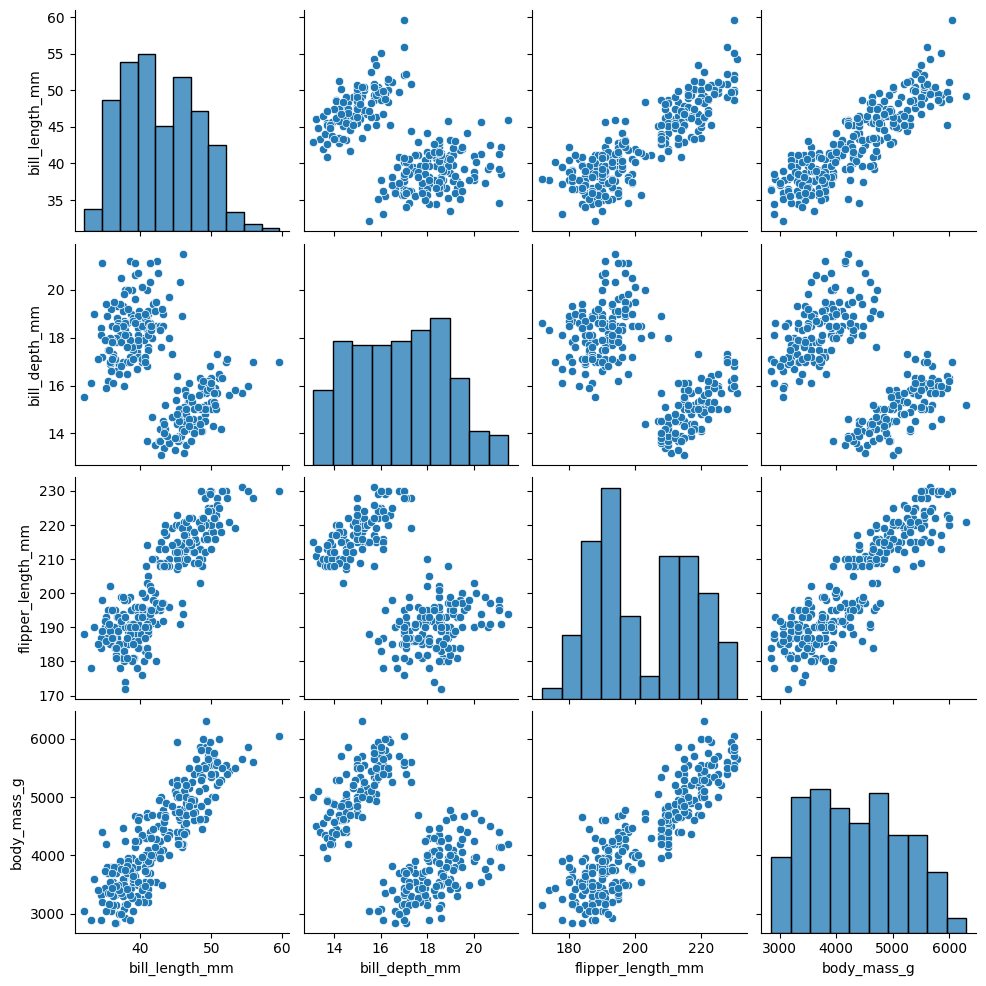

In [28]:
sns.pairplot(penguins_final)


### **Observations from the Scatterplots:**  
There are **three strong linear relationships** in the dataset:  

1. **Bill length (mm) and flipper length (mm)**  
2. **Bill length (mm) and body mass (g)**  
3. **Flipper length (mm) and body mass (g)**  

For this analysis, I will focus on **predicting body mass (g) using bill length (mm)**.  

## **Building the Simple Linear Regression Model**  

Based on the scatterplots, several potential linear relationships emerge. For this part of the analysis, I will focus on examining the relationship between **bill length (mm)** and **body mass (g)** using simple linear regression.  

To begin, I will subset the dataset to include only the relevant variables, ensuring that the analysis remains focused and interpretable.

### **Subsetting Data for Regression Analysis**  
I select **bill length** as the independent variable (`X`) and **body mass** as the dependent variable (`Y`):  

In [29]:
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

### **Defining the Regression Formula** 

Next, I will define the linear regression formula as a string. In this formula, the dependent variable (body mass in grams) is placed before the ~ symbol, while the independent variable (bill length in millimeters) follows it. This setup ensures that the model correctly predicts body mass based on bill length.

I write the regression formula:

In [30]:
ols_formula = "body_mass_g ~ bill_length_mm"

This follows the format:  
**Y (dependent variable) ~ X (independent variable)**  

### **Building and Fitting the Model**  
I use the `ols()` function from **statsmodels** to create the regression model.

I will pass the ols_formula and ols_data as arguments to the ols() function. After saving the results in a variable, I will use the .fit() method to train the model on the data, estimating the relationship between bill length and body mass.

In [31]:
OLS = ols(formula=ols_formula, data=ols_data)
model = OLS.fit()

### **Interpreting Model Summary**  

Lastly, I will call the summary() function on the model object to obtain the regression coefficients and other statistical metrics. The output from model.summary() will help evaluate the model’s performance and interpret the strength and significance of the relationship between bill length and body mass.

I obtain the regression summary:  

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.33e-85
Time:                        10:59:06   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary provides important details, including:  
- **Intercept** – The predicted body mass when bill length is zero  
- **Slope** – The change in body mass per unit increase in bill length  
- **R-squared** – The proportion of variance in body mass explained by bill length  

## **Visualizing the Regression Line**  

I will use the `regplot()` function from `seaborn` to visualize the regression line. This plot will help illustrate the relationship between bill length and body mass, showing how well the linear regression model fits the data.

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

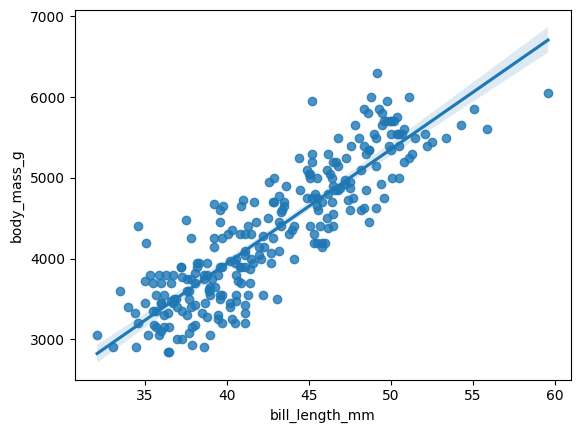

In [33]:
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)


The **regression line** shows how body mass changes with bill length.  

## **Checking Model Assumptions**  

A simple linear regression model must satisfy four key assumptions:  
1. **Linearity** – The relationship between X and Y is linear.  
2. **Normality** – The residuals follow a normal distribution.  
3. **Independent observations** – Observations are not correlated.  
4. **Homoscedasticity** – Residuals have constant variance.  

### **Checking Linearity and Independence**  

To evaluate the model assumptions, I will analyze the residuals, as they serve as an approximation of the errors. Since **linearity** was already assessed through the scatterplot matrix, and the assumption of **independent observations** is reasonable given that one penguin’s body mass or bill length is unlikely to influence another’s, we can check off assumptions 1 and 3. The next step is to assess the **normality** and **homoscedasticity** of residuals.

The normality and homoscedasticity assumptions pertain to the distribution of errors, meaning they can only be assessed after constructing the model. To evaluate these assumptions, I will examine the residuals, which serve as an approximation of the errors in the model.

To facilitate this, I will:
- Subset the X variable by isolating the `bill_length_mm` column.
- Save the predicted values from the model using the `model.predict(X)` function.
- Examine residual distributions and plots to assess normality and homoscedasticity.

In [34]:
X = ols_data["bill_length_mm"]

fitted_values = model.predict(X)

### **Checking Normality of Residuals**  

Then, I will save the model residuals as a variable by using the `model.resid` attribute.

In [35]:
residuals = model.resid


### Check the normality assumption

To check the normality assumption, I will create a histogram of the residuals using the `histplot()` function from the `seaborn` package.  

From the resulting histogram, I can assess whether the residuals follow a roughly normal distribution. If the distribution appears approximately bell-shaped and symmetric, the normality assumption is likely met. In this case, minor deviations are usually acceptable.

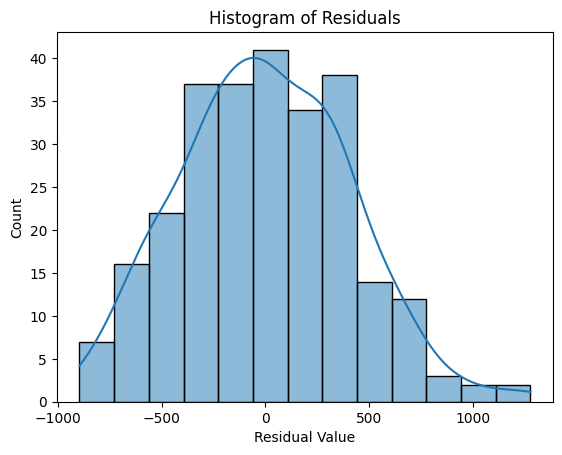

In [36]:
fig = sns.histplot(residuals, kde=True)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality assumption is by creating a **quantile-quantile (Q-Q) plot**. If the residuals follow a normal distribution, the points in the Q-Q plot should align closely along a straight diagonal line from the bottom left to the top right.  

I will generate the Q-Q plot using the `qqplot` function from the `statsmodels.api` package. This visualization provides a more detailed look at how the residuals compare to a theoretical normal distribution.  

From the Q-Q plot, I can observe a pattern similar to the histogram. The residuals appear mostly normally distributed, though there may be slight deviations at the ends of the distribution. Minor deviations are generally acceptable unless they indicate strong skewness or heavy tails, which could impact the model’s validity.

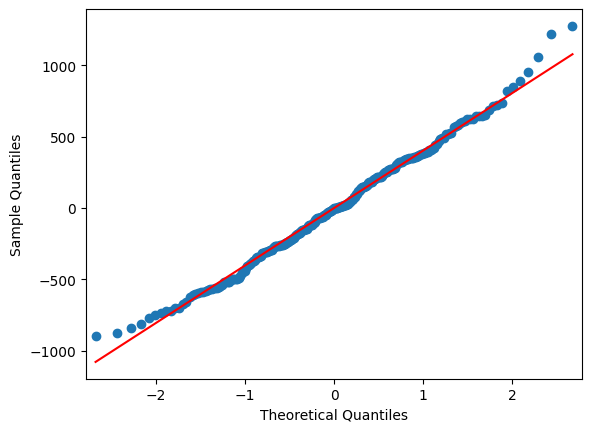

In [37]:
fig = sm.qqplot(model.resid, line='s')
plt.show()

The residuals align with the diagonal line, they are **approximately normal**.  


### **Checking Homoscedasticity**  

Lastly, I need to check the **homoscedasticity** assumption. This assumption requires that the residuals exhibit constant variance across all levels of the independent variable. If this assumption holds, the residuals should be randomly scattered around zero without forming any distinct pattern.  

To visualize this, I will create a **scatterplot of fitted values vs. residuals** using the `scatterplot()` function from the `seaborn` package. The fitted values will be placed on the x-axis, and the residuals will be on the y-axis.  

If the plot resembles a **random cloud** without a clear pattern (such as a funnel shape or curved trend), then the assumption of homoscedasticity is likely met. However, if I observe systematic patterns, such as increasing or decreasing spread, it could indicate heteroscedasticity, suggesting that the model might not fit all data points equally well.

I plot the **residuals vs. fitted values**:  

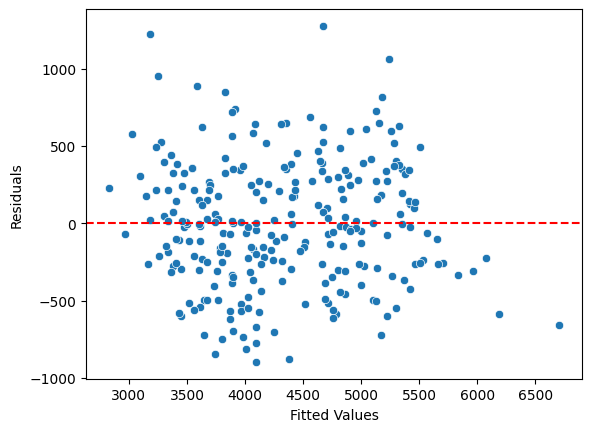

In [38]:
fitted_values = model.predict(ols_data["bill_length_mm"])

fig = sns.scatterplot(x=fitted_values, y=residuals)

fig.axhline(0, color="red", linestyle="--")

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

plt.show()


The points are **randomly scattered**, the homoscedasticity assumption holds.  


## **Summary of Findings**  

- **Regression Relationship**: **Bill length is positively correlated with body mass**.  
- **Model Fit**: The **R-squared** value indicates how well bill length predicts body mass.  
- **Assumptions Checked**:  
  - **Linearity**: Verified using scatterplots.  
  - **Normality**: Residuals are approximately normal.  
  - **Independence**: No dependency between penguin measurements.  
  - **Homoscedasticity**: Residuals appear randomly scattered.  

_____________for end section______________________
## **Conclusion**  

I successfully built a **simple linear regression model** to predict **penguin body mass based on bill length**. This process involved **EDA, model construction, assumption checking, and visualization**. These techniques can be extended to other datasets and more complex models.